In [1]:
%load_ext autoreload
%autoreload all

# Programming

In [1]:
!{__import__('sys').executable} -m pip install --quiet tqdm
!{__import__('sys').executable} -m pip install --quiet --editable energyplus-extras matplotlib-extras

## Importing ~~`pyenergyplus`~~ `ooep`

In [2]:
import ooep
import ooep.utils
import ooep.ems

## `ooep` - EnergyPlus API, Object-Oriented

<table style="text-align: center">
    <caption>Architecture Overview (*NIX)</caption>
    <tr>
        <th>EnergyPlus<br>OO Abstraction Layer</th>
        <th rowspan="2">&rlhar;</th>
        <th colspan="3">EnergyPlus<br>State Machine</th>
    </tr>
    <tr>
        <td>
            API<br>
            <code>ooep</code>
        </td>
        <td>
            API<br>
            (<code>pyenergyplus</code>)<br>
            (<code>libenergyplusapi.so</code>)
        </td>
        <td>ABI<br>&rlhar;</td>
        <td>Kernel<br>(<code>energyplus</code>)</td>
    </tr>
</table>

In [3]:
list(ooep.utils.energyplus.dataset.models.glob('*.idf'))[:10]

[PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/RadLoTempHydrCoolTower.idf'),
 PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/5ZoneCoolingPanelBaseboard.idf'),
 PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/EMSWindowShadeControl.idf'),
 PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/QTFtest.idf'),
 PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/AirflowNetwork_MultiZone_House_OvercoolDehumid.idf'),
 PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/IndEvapCoolerRTUoffice.idf'),
 PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/HeatPumpWaterToAirWithRHControl.idf'),
 PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/VAVSingleDuctReheatNoReheat.idf'),
 PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/LBuilding-G180.idf'),
 PosixPath('/home/edu/.local/EnergyPlus-23-1-0/ExampleFiles/5ZoneWaterCooled_HighRHControl.idf')]

### `ooep` in Action

#### Setup

- (Context/State Management) Enter `ooep.ems` environment...
  Don't forget to `__close__` it when done \
  OR better yet, just use `python`'s `with`-statement:
  ```python
    import ooep.ems
    with ooep.ems.Environment() as e:
        # NOTE do whatever you need to do with `e`
        ...
  ```

In [4]:
env = ooep.ems.Environment().__enter__()

- 🎉

In [5]:
env('--help', console_output=True)


PythonLinkage: Linked to Python Version: "3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0]"
Built on Platform: Ubuntu22.04_x86_64
Usage: energyplus [options] [input-file]
Options:
  -a, --annual                 Force annual simulation
  -c, --convert                Output IDF->epJSON or epJSON->IDF, dependent on
                               input file type
  -D, --design-day             Force design-day-only simulation
  -d, --output-directory ARG   Output directory path (default: current
                               directory)
  -h, --help                   Display help information
  -i, --idd ARG                Input data dictionary path (default: Energy+.idd
                               in executable directory)
  -j, --jobs ARG               Multi-thread with N threads; 1 thread with no
                               arg. (Currently only for G-Function generation)
  -m, --epmacro                Run EPMacro prior to simulation
  -p, --output-prefi

0

In [6]:
env = env.__enter__()

env(
    # TODO
    '--design-day',
    '--output-directory', 'build/demo-eplus',
    '--weather', f'{ooep.utils.energyplus.dataset.weathers}/USA_FL_Tampa.Intl.AP.722110_TMY3.epw',
    #f'{ooep.utils.energyplus.dataset.models}/CoolingTower_VariableSpeed_MultiCell.idf'
    f'{ooep.utils.energyplus.dataset.models}/ASHRAE901_OfficeLarge_STD2019_Denver_Chiller205_Detailed.idf'
)

0

#### Variables

In [7]:
env.specs.variables

,variable_name,variable_key
0,Site Outdoor Air Drybulb Temperature,ENVIRONMENT
1,Site Outdoor Air Dewpoint Temperature,ENVIRONMENT
2,Site Outdoor Air Wetbulb Temperature,ENVIRONMENT
3,Site Wind Speed,ENVIRONMENT
4,Site Sky Temperature,ENVIRONMENT
...,...,...
2093,Zone Mechanical Ventilation No Load Heat Addit...,DATACENTER_BASEMENT_ZN_6
2094,Zone Mechanical Ventilation Heating Load Incre...,DATACENTER_BASEMENT_ZN_6
2095,Zone Mechanical Ventilation Heating Load Incre...,DATACENTER_BASEMENT_ZN_6
2096,Zone Mechanical Ventilation Heating Load Decre...,DATACENTER_BASEMENT_ZN_6


- Variable keys

In [8]:
env.specs.variables['variable_key'].unique()

array(['ENVIRONMENT', 'BASEMENT', 'CORE_BOTTOM', 'CORE_MID', 'CORE_TOP',
       'PERIMETER_BOT_ZN_3', 'PERIMETER_BOT_ZN_2', 'PERIMETER_BOT_ZN_1',
       'PERIMETER_BOT_ZN_4', 'PERIMETER_MID_ZN_3', 'PERIMETER_MID_ZN_2',
       'PERIMETER_MID_ZN_1', 'PERIMETER_MID_ZN_4', 'PERIMETER_TOP_ZN_3',
       'PERIMETER_TOP_ZN_2', 'PERIMETER_TOP_ZN_1', 'PERIMETER_TOP_ZN_4',
       'GROUNDFLOOR_PLENUM', 'MIDFLOOR_PLENUM', 'TOPFLOOR_PLENUM',
       'DATACENTER_BOT_ZN_6', 'DATACENTER_MID_ZN_6',
       'DATACENTER_TOP_ZN_6', 'DATACENTER_BASEMENT_ZN_6',
       'BASEMENT_LIGHTS', 'CORE_BOTTOM_LIGHTS', 'CORE_MID_LIGHTS',
       'CORE_TOP_LIGHTS', 'PERIMETER_BOT_ZN_3_LIGHTS',
       'PERIMETER_BOT_ZN_2_LIGHTS', 'PERIMETER_BOT_ZN_1_LIGHTS',
       'PERIMETER_BOT_ZN_4_LIGHTS', 'PERIMETER_MID_ZN_3_LIGHTS',
       'PERIMETER_MID_ZN_2_LIGHTS', 'PERIMETER_MID_ZN_1_LIGHTS',
       'PERIMETER_MID_ZN_4_LIGHTS', 'PERIMETER_TOP_ZN_3_LIGHTS',
       'PERIMETER_TOP_ZN_2_LIGHTS', 'PERIMETER_TOP_ZN_1_LIGHTS',
       'PE

In [9]:
env.specs.variables[
    env.specs.variables['variable_key']
        .str
        .contains('CORE_MID')
]

,variable_name,variable_key
17,Zone Total Internal Latent Gain Energy,CORE_MID
18,Zone Total Internal Latent Gain Rate,CORE_MID
65,People Occupant Count,CORE_MID
66,People Air Temperature,CORE_MID
67,People Air Relative Humidity,CORE_MID
111,Zone People Occupant Count,CORE_MID
112,Zone People Total Heating Energy,CORE_MID
141,Lights Electricity Energy,CORE_MID_LIGHTS
165,Zone Lights Electricity Rate,CORE_MID
166,Zone Lights Electricity Energy,CORE_MID


#### Internal Variables

In [10]:
env.specs.internal_variables

,variable_type,variable_key
0,Plant Design Volume Flow Rate,SHWSYS1
1,Plant Design Volume Flow Rate,HEATSYS1
2,Plant Design Volume Flow Rate,COOLSYS1_SUPPLY
3,Plant Design Volume Flow Rate,COOLSYS1_DEMAND
4,Plant Design Volume Flow Rate,TOWERWATERSYS
...,...,...
743,Pump Maximum Mass Flow Rate,SHWSYS1 PUMP
744,Pump Maximum Mass Flow Rate,COOLSYS1 CHILLER1 PUMP
745,Pump Maximum Mass Flow Rate,COOLSYS1 CHILLER2 PUMP
746,Pump Maximum Mass Flow Rate,PLANT CIRC PUMP


#### Meters

In [11]:
env.specs.meters

,meter_name
0,Electricity:Facility
1,Electricity:Building
2,Electricity:Zone:BASEMENT
3,Electricity:SpaceType:GENERAL
4,InteriorLights:Electricity
...,...
313,General:Pumps:Electricity
314,Carbon Equivalent:Facility
315,CarbonEquivalentEmissions:Carbon Equivalent
316,WIRED_LTG_ELECTRICITY


#### Actuators

In [12]:
env.specs.actuators

,component_type,control_type,actuator_key
0,Weather Data,Outdoor Dry Bulb,Environment;
1,Weather Data,Outdoor Dew Point,Environment;
2,Weather Data,Outdoor Relative Humidity,Environment;
3,Weather Data,Diffuse Solar,Environment;
4,Weather Data,Direct Solar,Environment;
...,...,...,...
5083,AirLoopHVAC,Availability Status,VAV_TOP WITH REHEAT;
5084,AirLoopHVAC,Availability Status,AIRLOOP DATACENTER BASEMENT;
5085,AirLoopHVAC,Availability Status,AIRLOOP DATACENTER BOT;
5086,AirLoopHVAC,Availability Status,AIRLOOP DATACENTER MID;


- Component types of the actuators...

In [13]:
env.specs.actuators['component_type'].unique()

array(['Weather Data', 'Schedule:Compact', 'Schedule:Constant',
       'Material', 'People', 'Lights', 'ElectricEquipment', 'Surface',
       'Zone', 'Zone Infiltration', 'Plant Loop Overall',
       'Supply Side Half Loop', 'Demand Side Half Loop',
       'Demand Side Branch', 'Plant Component Pipe:Adiabatic',
       'Plant Component WaterUse:Connections', 'Supply Side Branch',
       'Plant Component Pump:ConstantSpeed',
       'Plant Component WaterHeater:Mixed',
       'Plant Component Coil:Heating:Water',
       'Plant Component Pump:VariableSpeed',
       'Plant Component Boiler:HotWater',
       'Plant Component HeatExchanger:FluidToFluid',
       'Plant Component Chiller:Electric:ASHRAE205',
       'Plant Component Coil:Cooling:Water',
       'Plant Component Coil:Cooling:WaterToAirHeatPump:EquationFit',
       'Plant Component Coil:Heating:WaterToAirHeatPump:EquationFit',
       'Plant Component FluidCooler:TwoSpeed',
       'Plant Component HeaderedPumps:VariableSpeed',
     

In [14]:
env.specs.actuators[
    env.specs.actuators['component_type'] 
        == 'Plant Component Chiller:Electric:ASHRAE205'
]

,component_type,control_type,actuator_key
1424,Plant Component Chiller:Electric:ASHRAE205,On/Off Supervisory,COOLSYS1 CHILLER1;
1427,Plant Component Chiller:Electric:ASHRAE205,On/Off Supervisory,COOLSYS1 CHILLER2;


In [15]:
env.specs.actuators[
    env.specs.actuators['component_type'] 
        == 'Plant Component CoolingTower:VariableSpeed'
]

,component_type,control_type,actuator_key
1504,Plant Component CoolingTower:VariableSpeed,On/Off Supervisory,TOWERWATERSYS COOLTOWER 1;
1506,Plant Component CoolingTower:VariableSpeed,On/Off Supervisory,TOWERWATERSYS COOLTOWER 2;


In [16]:
env.specs.actuators[
    env.specs.actuators['component_type'].isin(
        ('Zone Temperature Control', 'Zone Humidity Control')
    )
]

,component_type,control_type,actuator_key
1631,Zone Temperature Control,Heating Setpoint,BASEMENT;
1632,Zone Temperature Control,Cooling Setpoint,BASEMENT;
1633,Zone Temperature Control,Heating Setpoint,CORE_BOTTOM;
1634,Zone Temperature Control,Cooling Setpoint,CORE_BOTTOM;
1635,Zone Temperature Control,Heating Setpoint,CORE_MID;
1636,Zone Temperature Control,Cooling Setpoint,CORE_MID;
1637,Zone Temperature Control,Heating Setpoint,CORE_TOP;
1638,Zone Temperature Control,Cooling Setpoint,CORE_TOP;
1639,Zone Temperature Control,Heating Setpoint,PERIMETER_BOT_ZN_3;
1640,Zone Temperature Control,Cooling Setpoint,PERIMETER_BOT_ZN_3;


#### Events

In [17]:
env.specs.events

,event_name
0,after_component_input
1,after_new_environment_warmup_complete
2,after_predictor_after_hvac_managers
3,after_predictor_before_hvac_managers
4,begin_new_environment
5,begin_system_timestep_before_predictor
6,begin_zone_timestep_after_init_heat_balance
7,begin_zone_timestep_before_init_heat_balance
8,begin_zone_timestep_before_set_current_weather
9,end_system_sizing


### Simulation

In [18]:
%matplotlib widget

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [35]:
class CallbackCounter:
    def __init__(self, fn=lambda *args, **kwargs: None):
        self._cnt = 0
        self._fn = fn

    def __call__(self, *args, **kwargs):
        self._cnt += 1
        return self._fn(*args, **kwargs)
    
    def summary(self):
        return f'{self!r} was called {self._cnt} times'

class CallbackSamplingCounter(CallbackCounter):
    def __init__(
        self, 
        fn=lambda *args, **kwargs: None, 
        sampling_intvl=None, 
    ):
        self.sampling_intvl = sampling_intvl
        
        def _fn(*args, **kwargs):
            nonlocal self, fn
            if (
                self.sampling_intvl is not None 
                    and self._cnt % self.sampling_intvl != 0
            ):
                return
            return fn(*args, **kwargs)
        
        super().__init__(fn=_fn)

class DemoCallback:
    def __init__(self, env: ooep.ems.Environment, data_fn=lambda data: None):
        self.env = env

        self.tmeter = env.variable(dict(
            variable_name='People Air Temperature',
            variable_key='CORE_MID'
        ))

        self.tstat_cool = env.actuator(dict(
            component_type='Zone Temperature Control',
            control_type='Cooling Setpoint',
            actuator_key='CORE_MID'
        ))

        self.tstat_heat = env.actuator(dict(
            component_type='Zone Temperature Control',
            control_type='Heating Setpoint',
            actuator_key='CORE_MID'
        ))

        self.stats = {
            'datetime': [],
            'zone_temp': [],
            'zone_tstat_setpoint_cool': [],
            'zone_tstat_setpoint_heat': []
        }

        self.data_fn = data_fn

    def __call__(self):
        if self.env.warming_up:
            return
        
        # TODO 
        #print(self.env._ep_api.exchange.zone_time_step_number(self.env._ep_state))

        # TODO read variables here
        try:
            data = {
                'datetime': self.env.datetime,
                'zone_temp': self.tmeter.value,
                'zone_tstat_setpoint_cool': self.tstat_cool.value,
                'zone_tstat_setpoint_heat': self.tstat_heat.value
            }
        except ooep.ems.NotReadyError:
            pass
        else:
            for k, v in data.items():
                self.stats[k].append(v)
            self.data_fn(self.stats)

        # TODO adjust actuator(s) accordingly
        try:
            #self.tstat_heat.value = 12.
            pass
        except self.tstat_heat.NotReadyError:
            pass

        try:
            #self.tstat_cool.value = 16.
            pass
        except self.tstat_cool.NotReadyError:
            pass

    def summary(self):
        pass

class DemoViz:
    def __init__(self, plt):
        self.fig, self.ax = plt.subplots()
        #self.ax.autoscale(enable=True)
        self.lines_xy = None

    def __call__(self, stats):
        if self.lines_xy is None:
            self.lines_xy = {
                'zone_temp': self.ax.plot(
                    [], [],
                    label='Zone Temperature',
                    linestyle='-', 
                    color='g'
                ),
                'zone_tstat_setpoint_cool': self.ax.plot(
                    [], [],
                    label='Zone Thermostat Temperature Setpoint (Cooling)',
                    linestyle='--', 
                    color='b'
                ),
                'zone_tstat_setpoint_heat': self.ax.plot(
                    [], [],
                    label='Zone Thermostat Temperature Setpoint (Heating)',
                    linestyle='--', 
                    color='r'
                )
            }

            self.ax.legend()
        
        for name_y, llines_xy in self.lines_xy.items():
            for line_xy in llines_xy:
                line_xy.set(
                    xdata=range(len(stats[name_y])), #stats['datetime'], 
                    ydata=stats[name_y]
                )
        
        self.ax.relim()
        self.ax.autoscale_view()
        
        self.fig.canvas.draw()
        #self.fig.canvas.flush_events()

In [8]:
%matplotlib widget

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

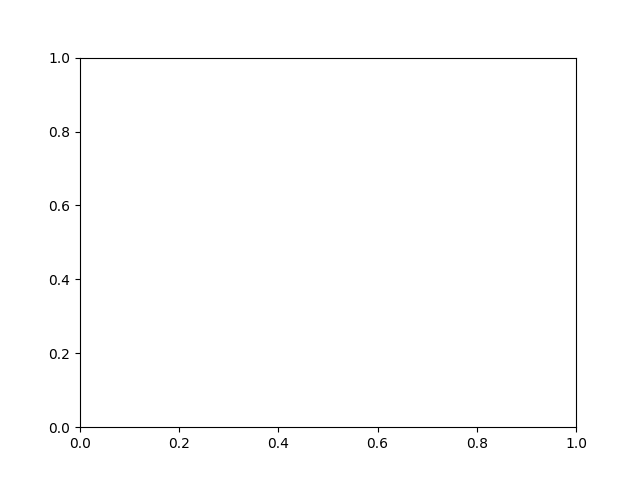

In [36]:
env = env.__enter__()

import matplotlib.pyplot as plt

plt.ion()


demo_cb = DemoCallback(env, data_fn=DemoViz(plt))
env.event(
    dict(event_name='begin_zone_timestep_after_init_heat_balance')
).callback = CallbackSamplingCounter(
    demo_cb,
    #sampling_intvl=10
)

In [37]:
import tqdm
import tqdm.notebook

with tqdm.notebook.tqdm(total=100) as pbar:
    def _f_tqdm_update_to(pbar, n):
        pbar.n = n
        pbar.refresh()
    env.event(dict(event_name='progress')).callback = lambda n: _f_tqdm_update_to(pbar, n)
    env.event(dict(event_name='message')).callback = lambda s: pbar.set_postfix_str(s.decode())

    # TODO async
    env(
        # TODO
        '--design-day',
        #'--annual',
        '--output-directory', 'build/demo-eplus',
        '--weather', f'{ooep.utils.energyplus.dataset.weathers}/USA_FL_Tampa.Intl.AP.722110_TMY3.epw',
        f'{ooep.utils.energyplus.dataset.models}/ASHRAE901_OfficeLarge_STD2019_Denver_Chiller205_Detailed.idf'
    )    

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
env.__exit__()